In [2]:
import torch
import matplotlib.pyplot as plt

In [9]:
# relu函数
x = torch.arange(-8, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)

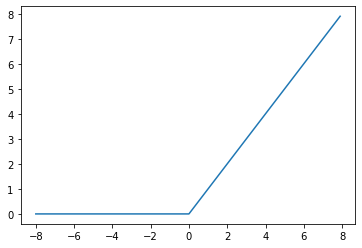

In [10]:
plt.plot(x.detach().numpy(), y.detach().numpy())

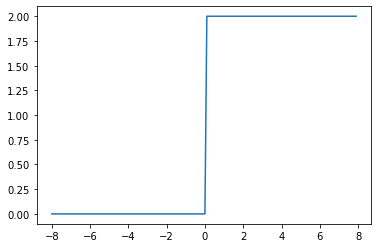

In [14]:
y.backward(torch.ones_like(x), retain_graph=True)
plt.plot(x.detach().numpy(), x.grad)

# 从零实现

In [16]:
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [18]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, 
                             requires_grad=True)*0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, 
                             requires_grad=True)*0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

In [19]:
# 激活函数
def relu(x):
    a = torch.zeros_like(x)
    return torch.max(x, a)

In [25]:
# 模型
def net(x):
    x = x.reshape((-1, num_inputs))
    H = relu(x@W1+b1)  # @为矩阵乘法
    return (H@W2+b2)

In [26]:
# 损失函数
loss = nn.CrossEntropyLoss()

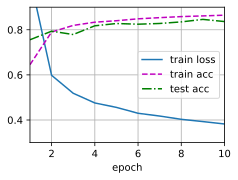

In [27]:
num_epochs, lr = 10, 0.1
optimizer = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, optimizer)